## Homework #2
Due 9/26/2024

In [105]:
#IMPORT LIBRARIES
import cv2 #openCV (C++)
import os
import numpy as np
import matplotlib.pyplot as plt

#READ IMAGE
cathedral = cv2.imread(filename=os.path.relpath('Data/Pitt_Cathedral.jpg'),
                       flags=1) #greyscale = 0, color = 1
#FIX COLOR CHANNELS
cathedral = cathedral[:, :, ::-1] #BGR -> RGB

## Problem 1
Define a function to implement the peak-signal-to-noise calculation as described in lecture 4.  

Note: In python functions have the form:

In [106]:
#DEFINE PSNR FUNCTION
def findPSNR(image1, image2):

    #ERROR CHECK
    if image1.shape != image2.shape:
        return
    
    #CONVER DATA TYPES
    image1 = np.float32(image1)
    image2 = np.float32(image2)

    #INITIALIZE VARIABLES
    r, c, d = image1.shape

    MSE = 0

    #CALCULATE MSE
    for color in range(d):
        for i in range(r):
            for j in range(c):
                MSE = MSE + (image1[i, j, color]-image2[i, j, color])**2
    MSE = MSE / np.float32(r * c * d)

    #CALCULATE PSNR
    PSNR = 20*np.log10(np.max(image1)/np.sqrt(MSE))

    return PSNR

## Problem 2
* a) Implement a spatial frequency low-pass filter at 1/3 the Nyquist frequency of the image using a top-hat window (e.g. binary 0/1)
* b) Calculate the peak-SNR comparing the two images
* c) Use any image you like.  Put the image in the data folder for this repo 

PSNR = 3.6051411628723145


Text(0.5, 1.0, 'Filtered Image')

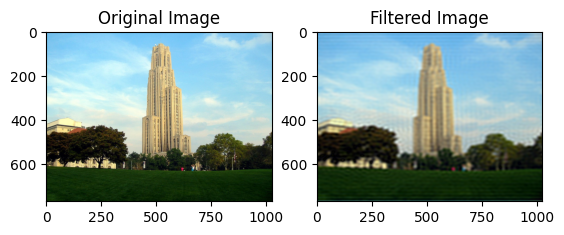

In [ ]:
cathedral_lpf = np.zeros(cathedral.shape)

#LOOP THROUGH CHANNEL
for color in range(3):

    #TAKE DFT
    cathedral_dft = cv2.dft(np.float32(cathedral[:, :, color]), flags=cv2.DFT_COMPLEX_OUTPUT)

    #SHIFT ZERO-FREQUENCY TO CENTER
    cathedral_dft = np.fft.fftshift(cathedral_dft)

    #FIND MAGNITUDE AND PHASE
    magnitude = 20*np.log(cv2.magnitude(cathedral_dft[:, :, 0], cathedral_dft[:, :, 1]))
    phase =  np.arctan2(cathedral_dft[:, :, 1], cathedral_dft[:, :, 0])

    x, y = np.indices(magnitude.shape)
    dx = magnitude.shape[0]/2
    dy = magnitude.shape[1]/2
    r = np.sqrt((x-dx)**2+(y-dy)**2)

    #SET fc TO 1/3 THE NYQUIST
    cutoff = (1/3)*np.min([dx, dy])
    LPF_mask = r < cutoff

    #PERFORM FILTER
    cathedral_dft_filtered = np.zeros(cathedral_dft.shape)
    cathedral_dft_filtered[:, :, 0] = cathedral_dft[:, :, 0]*LPF_mask
    cathedral_dft_filtered[:, :, 1] = cathedral_dft[:, :, 1]*LPF_mask
    magnitude_filtered = magnitude*LPF_mask

    #SHIFT BACK
    cathedral_dft_filtered = np.fft.ifftshift(cathedral_dft_filtered)

    #RECOVER IMAGE
    cathedral_filtered = cv2.idft(cathedral_dft_filtered) #inverse DFT
    cathedral_filtered = cv2.magnitude(cathedral_filtered[:, :, 0], cathedral_filtered[:, :, 1]) #find magnitude of complex value

    #INSERT CHANNEL INTO ARRAY
    cathedral_lpf[:, :, color] = cathedral_filtered/np.max(cathedral_filtered)

#FIND PSNR
PSNR = findPSNR(cathedral, cathedral_lpf)
print(f"PSNR = {PSNR}")

#PRINT IMAGES
plt.figure()
plt.subplot(121)
plt.imshow(X=cathedral)
plt.title("Original Image")

plt.subplot(122)
plt.imshow(X=cathedral_lpf)
plt.title("Filtered Image")

## Problem 3
Implement a similar low-pass filter as problem 2 (1/3 the Nyquist) in the spatial domain as a kernel convolution (e.g. using the sinc function definitions in lecture 5).  Use a top-hat window (e.g. without worrying about tapering the edges).  Use the same image you used in problem 2. 

PSNR = 16.04118537902832


Text(0.5, 1.0, 'LPF Center Channel')

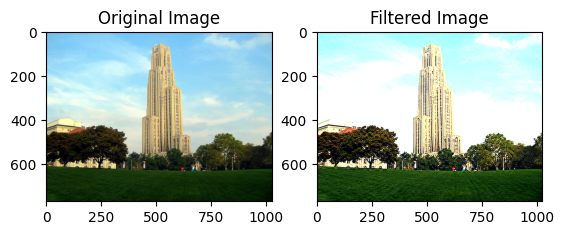

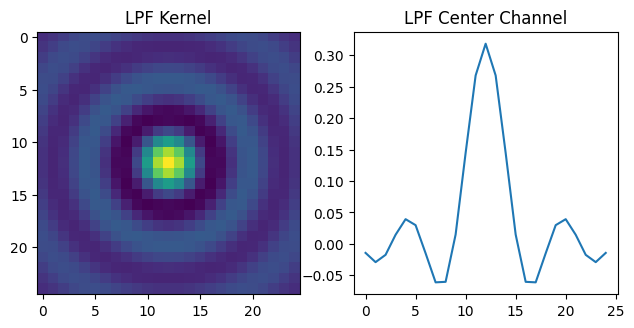

In [ ]:
#LPF KERNEL
x, y = np.indices([25,25])  #25x25 kernel
x = x-12; y = y-12; #make x[12, :] = y[:, 12] = 0
r = np.sqrt(x**2+y**2) #calculate r
r[12, 12] = 1 #ensure r is not 0 (temporary)

fc = 1/3 #set cutoff frequency to 1/3 the Nyquist frequency
LPF_kernel = np.sin(r*fc)/(np.pi*r) #calculate LPF kernel
LPF_kernel[12,12]=fc/np.pi #replace point where r was 0

#WINDOWED LPF KERNEL
# LPF_kernel_windowed = LPF_kernel*np.outer(np.hanning(25), np.hanning(25))

#PASS IMAGE THROUGH FILTER
cathedral_lpf = cv2.filter2D(src=cathedral, ddepth=-1, kernel=LPF_kernel)

#FIND PSNR
PSNR = findPSNR(cathedral, cathedral_lpf)
print(f"PSNR = {PSNR}")

#PRINT IMAGES
plt.figure()
plt.subplot(121)
plt.imshow(X=cathedral)
plt.title("Original Image")

plt.subplot(122)
plt.imshow(X=cathedral_lpf)
plt.title("Filtered Image")

#PRINT FILTERS
plt.figure(figsize=[7.5, 7.5])
plt.subplot(221)
plt.imshow(LPF_kernel)
plt.title("LPF Kernel") 
plt.subplot(222)
plt.plot(LPF_kernel[:, 12])
plt.title("LPF Center Channel") 

# plt.subplot(223)
# plt.imshow(LPF_kernel_windowed)
# plt.title("Windowed LPF Kernel") 
# plt.subplot(224)
# plt.plot(LPF_kernel_windowed[:,12])
# plt.title("Windowed LPF Center Channel") 

## Problem 4
Define a function to implement a mean smoothing kernel filter.  

[ECE1390]
* As an input to your function, allow the user to select between a arithmatic, geometric, or harmonic mean
* Assume a fixed 3x3 binary morphological kernel 

[ECE 2690]
* As an input to your function, allow the user to select between a arithmatic, geometric, harmonic mean, or contraharmonic mean ("m" should be an input parameter)
* Design your function to allow any arbitary binary morphological kernel 

In [ ]:
def meanSmoothing():

## Problem 5 [ECE 2390 only]
Define a function to compute the discrete cosine transform of an image.  Include code to pad the image appropriately. The equation for the DCT was given in lecture 4  